# Ingestion

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("final_test.csv",index_col=False)

In [3]:
df.head()

,Unnamed: 0,weight,age,height,size,size_in_num
0,0,62,28.0,172.72,XL,4.0
1,1,59,36.0,167.64,L,3.0
2,2,61,34.0,165.10,M,2.0
3,3,65,27.0,175.26,L,3.0
4,4,62,45.0,172.72,M,2.0


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
del df['size_in_num']

In [5]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


# EDA

In [6]:
df.shape

(119734, 4)

In [7]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


## Treating missing values

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [11]:
df.shape

(119153, 4)

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119729     True
119730     True
119731     True
119732     True
119733     True
Length: 119153, dtype: bool

## Treating Duplicates

In [13]:
dup=df[df.duplicated()]

In [14]:
dup

,weight,age,height,size
51,65,33.0,165.10,L
107,58,29.0,162.56,L
136,65,33.0,167.64,L
206,53,32.0,165.10,S
228,61,30.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [15]:
dup.index

Index([    51,    107,    136,    206,    228,    273,    346,    370,    395,
          405,
       ...
       119724, 119725, 119726, 119727, 119728, 119729, 119730, 119731, 119732,
       119733],
      dtype='int64', length=92182)

In [16]:
df.drop(dup.index,inplace=True)

In [17]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119683    False
119708    False
119715    False
119720    False
119721    False
Length: 26971, dtype: bool

In [18]:
len(df)

26971

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['weight']=mm.fit_transform(df[['weight']])
df['age']=mm.fit_transform(df[['age']])
df['height']=mm.fit_transform(df[['height']])


# Removing Outliers

In [19]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


<Axes: xlabel='weight'>

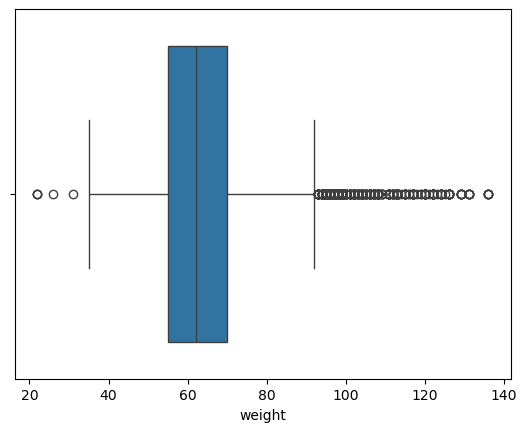

In [20]:
import seaborn as sns
sns.boxplot(x=df['weight'],data=df)

In [21]:
col=['weight','age','height']
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
outliers=df[((df[col]<=lb) | (df[col]>=ub)).any(axis=1)]
df=df.drop(outliers.index)

<Axes: xlabel='weight'>

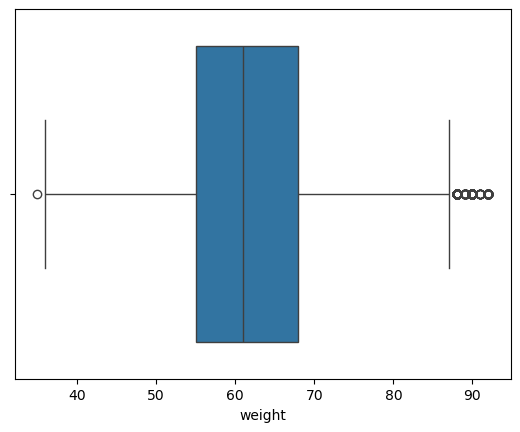

In [22]:
import seaborn as sns
sns.boxplot(x=df['weight'],data=df)

In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['size']=lb.fit_transform(df['size'])

In [25]:
import pickle as pk
with open('label.pkl','wb')as f:
    pk.dump(lb,f)

In [23]:
import pickle as pk
with open('model.pkl','wb')as f:
    pk.dump(df,f)

In [26]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [27]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [28]:
df['size'].value_counts()

size
6    5679
1    4745
3    4577
0    4095
2    4000
5    2523
4      66
Name: count, dtype: int64

In [29]:
df.corr()

,weight,age,height,size
weight,1.000000,0.042686,0.374281,0.369620
age,0.042686,1.000000,-0.006986,0.051316
height,0.374281,-0.006986,1.000000,0.019174
size,0.369620,0.051316,0.019174,1.000000


In [30]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [31]:
df.corr()

,weight,age,height,size
weight,1.000000,0.042686,0.374281,0.369620
age,0.042686,1.000000,-0.006986,0.051316
height,0.374281,-0.006986,1.000000,0.019174
size,0.369620,0.051316,0.019174,1.000000


In [32]:
x=df.iloc[:,0:2]
y=df['size']

In [33]:
from sklearn.feature_selection import SelectKBest,chi2
sk=SelectKBest(chi2,k=1)
sk.fit_transform(x,y)

array([[62.],
       [59.],
       [61.],
       ...,
       [65.],
       [58.],
       [62.]])

In [34]:
y.value_counts()

size
6    5679
1    4745
3    4577
0    4095
2    4000
5    2523
4      66
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')
x,y=sm.fit_resample(x,y)

In [36]:
y.value_counts()

size
6    5679
4    5679
1    4745
3    4577
0    4095
2    4000
5    2523
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

In [38]:
x.head()

,weight,age
0,62,28.0
1,59,36.0
2,61,34.0
3,65,27.0
4,62,45.0


In [39]:
y.head()

0    3
1    0
2    1
3    0
4    1
Name: size, dtype: int32

In [40]:
from sklearn.naive_bayes import GaussianNB
gu=GaussianNB()
gu.fit(xtrain,ytrain)

GaussianNB()

In [41]:
gu.score(xtrain,ytrain)

0.38099092574447235

In [42]:
gu.score(xtest,ytest)

0.38044728434504793

In [43]:
ypred=gu.predict(xtest)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[   1,  334,  103,    8,  516,    7,   70],
       [   0,  431,  293,    5,  352,   75,   18],
       [   0,  301,  389,    1,  111,  223,    5],
       [   1,  232,   59,   12,  588,    7,  205],
       [   1,  162,   12,   23, 1026,    0,  130],
       [   0,   76,  277,    0,   22,  290,    4],
       [   1,   73,   10,   21,  517,    5,  828]], dtype=int64)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [46]:
dt.score(xtrain,ytrain)

0.5318877007625783

In [47]:
dt.score(xtest,ytest)

0.4028115015974441

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\kahit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr.score(xtrain,ytrain)

0.369317939760576

In [50]:
lr.score(xtest,ytest)

0.3695846645367412

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [52]:
rf.score(xtrain,ytrain)

0.5318450986239509

In [53]:
rf.score(xtest,ytest)

0.4131629392971246

In [54]:
import pickle as pk
with open('sizes.pkl','wb')as f:
    pk.dump(rf,f)

# Flask App

In [ ]:
from flask import Flask, render_template, request
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField
from wtforms.validators import DataRequired
import pickle
import numpy as np
import os
from datetime import datetime

app = Flask(__name__)
app.config['SECRET_KEY'] = 'kah'

try:
    with open('sizes.pkl', 'rb') as file:
        size_model = pickle.load(file)
    print("Size prediction model loaded successfully.")

    with open('label.pkl', 'rb') as file:
        size_labels = pickle.load(file)
    print("Size labels loaded successfully.")

except FileNotFoundError:
    print("Error: Model files not found. Please ensure 'sizes.pkl' and 'label.pkl' exist.")
    size_model = None
    size_labels = {}

except Exception as e:
    print(f"Error loading model: {e}")
    size_model = None
    size_labels = {}

class SizePredictionForm(FlaskForm):
    weight_kg = StringField('Weight (in kg):', validators=[DataRequired()])
    height_cm = StringField('Height (in cm):', validators=[DataRequired()])
    submit = SubmitField('Predict Size')

def preprocess_input(weight_str, height_str):
    try:
        weight_value = float(weight_str)
        height_value = float(height_str)
    except ValueError:
        print("Error: Invalid numeric input. Using default values.")
        weight_value = 0
        height_value = 0
    return np.array([[weight_value, height_value]])
@app.route('/', methods=['GET', 'POST'])
def index():
    form = SizePredictionForm()
    prediction_result = None
    error_message = None

    if form.validate_on_submit():
        if size_model is None:
            error_message = "Machine learning model not loaded. Please check server logs."
        else:
            try:
                weight = form.weight_kg.data
                height = form.height_cm.data

                input_for_model = preprocess_input(weight, height)
                predicted_raw_size = size_model.predict(input_for_model)[0]
                predicted_label_key = int(round(predicted_raw_size))
                predicted_size = size_labels.inverse_transform([predicted_label_key])[0]

                prediction_result = {
                    'weight': weight,
                    'height': height,
                    'size': predicted_size
                }

            except Exception as e:
                error_message = f"An error occurred during prediction: {str(e)}"
                print(f"Prediction error: {e}")

    return render_template('index.html', form=form, prediction_result=prediction_result, error_message=error_message)

app.run()

Size prediction model loaded successfully.
Size labels loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [01/Sep/2025 23:12:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2025 23:12:55] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\kahit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [01/Sep/2025 23:13:11] "POST / HTTP/1.1" 200 -
